In [1]:
%cd ..

C:\Users\Brown Research\Documents\vr-exoskeleton


# loss

In [2]:
import os

import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
stamps_mlp = [
    '1738721724_mlp_90hz-angle-h8-8-train_arc-eval_arc_s38',
    '1738722306_mlp_90hz-angle-h8-8-train_arc-eval_linear_s38',
    '1738722606_mlp_90hz-angle-h8-8-train_arc-eval_search_s38',
    '1738723049_mlp_90hz-angle-h8-8-train_arc-eval_avoid_s38',
    '1738723350_mlp_90hz-angle-h8-8-train_arc-eval_all_s38',
    '1738723987_mlp_90hz-angle-h8-8-train_linear-eval_arc_s38',
    '1738724627_mlp_90hz-angle-h8-8-train_linear-eval_linear_s38',
    '1738725269_mlp_90hz-angle-h8-8-train_linear-eval_search_s38',
    '1738725599_mlp_90hz-angle-h8-8-train_linear-eval_avoid_s38',
    '1738725986_mlp_90hz-angle-h8-8-train_linear-eval_all_s38',
    '1738726850_mlp_90hz-angle-h8-8-train_search-eval_arc_s38',
    '1738727120_mlp_90hz-angle-h8-8-train_search-eval_linear_s38',
    '1738727735_mlp_90hz-angle-h8-8-train_search-eval_search_s38',
    '1738728377_mlp_90hz-angle-h8-8-train_search-eval_avoid_s38',
    '1738728848_mlp_90hz-angle-h8-8-train_search-eval_all_s38',
    '1738729399_mlp_90hz-angle-h8-8-train_avoid-eval_arc_s38',
    '1738729840_mlp_90hz-angle-h8-8-train_avoid-eval_linear_s38',
    '1738730284_mlp_90hz-angle-h8-8-train_avoid-eval_search_s38',
    '1738730727_mlp_90hz-angle-h8-8-train_avoid-eval_avoid_s38',
    '1738731171_mlp_90hz-angle-h8-8-train_avoid-eval_all_s38',
    '1738731808_mlp_90hz-angle-h8-8-train_all-eval_arc_s38',
    '1738732978_mlp_90hz-angle-h8-8-train_all-eval_linear_s38',
    '1738733984_mlp_90hz-angle-h8-8-train_all-eval_search_s38',
    '1738734993_mlp_90hz-angle-h8-8-train_all-eval_avoid_s38',
    '1738736006_mlp_90hz-angle-h8-8-train_all-eval_all_s38',
]

losses_mlp = [list() for _ in range(5)]
prefix_test_loss = 'test loss: '
for i, stamp in enumerate(stamps_mlp):
    with open(os.path.join('output', stamp, 'log.txt'), 'r') as fd:
        lines = fd.readlines()
        line = lines[33]
        if not line.startswith(prefix_test_loss):
            raise ValueError
        losses_mlp[i // 5].append(float(line[len(prefix_test_loss):]))
losses_mlp

[[1.032e-05, 2.12e-05, 9.42e-05, 8.977e-05, 5.299e-05],
 [1.015e-05, 1.151e-05, 9.483e-05, 9.543e-05, 5.392e-05],
 [5.011e-05, 7.429e-05, 9.481e-05, 8.021e-05, 7.258e-05],
 [0.0001197, 8.388e-05, 0.00011434, 0.00011242, 6.792e-05],
 [3.939e-05, 2.186e-05, 7.547e-05, 7.709e-05, 6.108e-05]]

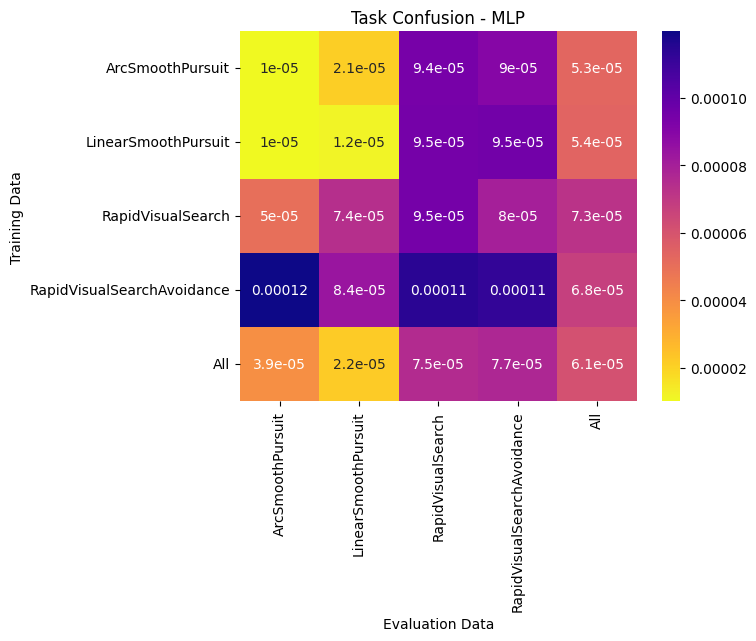

In [4]:
suite_names = ['ArcSmoothPursuit', 'LinearSmoothPursuit', 'RapidVisualSearch', 'RapidVisualSearchAvoidance', 'All']

sns.heatmap(
    losses_mlp,
    cmap='plasma_r',
    annot=True,
    xticklabels=suite_names,
    yticklabels=suite_names,
)
plt.title('Task Confusion - MLP')
plt.ylabel('Training Data')
plt.xlabel('Evaluation Data')
plt.show()